# Lab 03 - 1 by Nicholas Fong, worked with Vivian Duong

In [1]:
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv(os.path.join('advertising-raw.csv'), index_col = 0)

df.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


## Let's do some boxplots!

E.g., `df[ ['column(s) of interest'] ].plot(kind = 'box')`

Axes(0.125,0.125;0.775x0.775)
Axes(0.125,0.125;0.775x0.775)
Axes(0.125,0.125;0.775x0.775)
Axes(0.125,0.125;0.775x0.775)


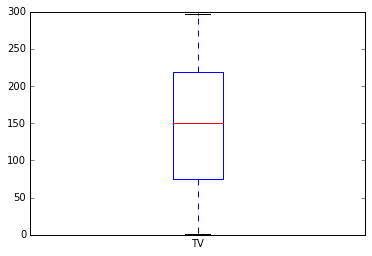

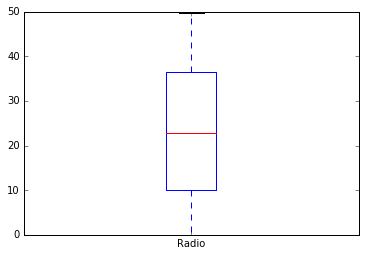

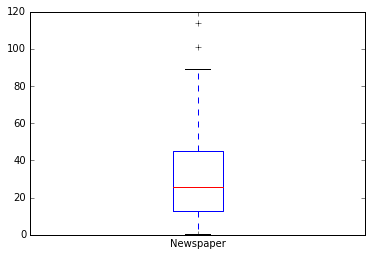

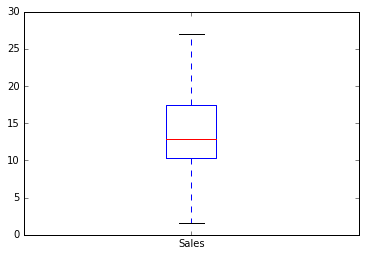

In [3]:
print df[ ['TV'] ].plot(kind = 'box')
print df[ ['Radio'] ].plot(kind = 'box')
print df[ ['Newspaper'] ].plot(kind = 'box')
print df[ ['Sales'] ].plot(kind = 'box')

### What do we learn from TV, radio, newspaper and sales boxplots?

Answer: All of the distributions seem fairly evenly distributed, except the Newspaper distribution is skewed right with a few outliers.

## Let's play with correlation!

Compute the correlation matrix of your data and explain what you've learned from it.  For instance, which variable can depict sales the best?  (TV, radio or newspaper).  What are the highest and lowest correlations?

In [4]:
df[['TV','Radio','Newspaper','Sales']].corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


What did you learn from the correlation matrix?

Answer: Sales increase with TV, Radio, and Newspaper, but TV has a higher impact on Sales than Radio, which has a higher impact than Newspaper. Thus TV can best predict Sales. The highest correlation (besides self correlation) is between TV and Sales at 0.782224. The lowest correlation is between TV and Radio at a mere 0.054809.

## Let's get rid of outliers!

1. Look over your boxplots and pick one variable that likely has outliers.
2. Find the Interquartile Range (IQR) of that variable.  You can do this in two different ways.
  - Use df.describe()
  - Use df.quantile()
3. Remember, one definition for outliers is anything that is more than `1.5 * IQR` above Q3 or `1.5 * IQR` below Q1.  For this exercise, solely focus on 1.5 * IQR above Q3)
4. Delete the rows for these outliers.

### Step 1:  Which variable seems to have outliers?

Answer: Newspaper is the only variable with outliers and its two outliers are visible from its boxplot.

In [5]:
# Hint: Start checking how many observations are in your DataFrame
len(df)

200

### Step 2: IQR

In [6]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


### Steps 3 and 4: Remove the outliers

In [7]:
#For all the values in the Newspaper column that are 1.5 * the IQR (75%-25%) above the 75%ile, remove the column
for i in df[df['Newspaper'] > (1.5*(df['Newspaper'].quantile(0.75)-df['Newspaper'].quantile(0.25))+df['Newspaper'].quantile(0.75))].index:
    df.drop(i,inplace=True)

In [8]:
# Sanity check: Check the length of your data and see if you have correctly dropped the outliers.
len(df)

198

In [9]:
df.to_csv(os.path.join('advertising-tidy.csv'))

# Your last mission!

Our goal is to divide our dataset to high and low Sales.  We would like to add a dummy variable called sales_dummy which is 0 if sales of that specific observation is below the median of all sales and 1 otherwise.

We can do it in shorter steps - but for education purposes, first define a variable called `SalesCategory` which is `Low` when sales is below the median and `High` otherwise.

In [10]:
def SalesCategory(input):
    return input < df['Sales'].quantile(0.5)

We can now  define a new variable called `SalesDummy` that serves our purpose.  Please use `.map()`.

In [11]:
# I asked the Professor and he said True/False is ok to use instead of 0/1 or 'Low'/'High'
SalesDummy = map(SalesCategory, df['Sales'])
SalesDummy

[False,
 True,
 True,
 False,
 False,
 True,
 True,
 False,
 True,
 True,
 True,
 False,
 True,
 True,
 False,
 False,
 False,
 True,
 False,
 False,
 True,
 True,
 False,
 True,
 True,
 False,
 False,
 False,
 True,
 False,
 True,
 True,
 False,
 True,
 True,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 True,
 False,
 False,
 True,
 True,
 True,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 True,
 True,
 True,
 False,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 True,
 False,
 True,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 True,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 True,
 False,
 False,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 False,
 True

In [12]:
len(SalesDummy)

198